In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
PATH = 'drive/My Drive/Experiment Design/'

### Results Elmo Task1

In [11]:
def load_elmo_results(dir_path, type):
  list_df_metrics = []
  for run in range(1, 6):
    file_name = f"{dir_path}/elmo_metrics_{type}_run{run}.txt"
    df = pd.read_csv(file_name, sep = ";")
    list_df_metrics.append(df)
  return list_df_metrics

metrics_inc = load_elmo_results(f"{PATH}results_elmo_task1", "inclusions")
metrics_exc = load_elmo_results(f"{PATH}results_elmo_task1", "exclusions")

In [25]:
# create list of metrics for inlcusions
proportional_precision_inc = [df.loc[0, "Proportional"] for df in metrics_inc]
binary_precision_inc = [df.loc[0, "Binary"] for df in metrics_inc]
proportional_recall_inc = [df.loc[1, "Proportional"] for df in metrics_inc]
binary_recall_inc = [df.loc[1, "Binary"] for df in metrics_inc]
proportional_f1_inc = [df.loc[2, "Proportional"] for df in metrics_inc]
binary_f1_inc = [df.loc[2, "Binary"] for df in metrics_inc]

# create list of metrics for exclusions
proportional_precision_exc = [df.loc[0, "Proportional"] for df in metrics_exc]
binary_precision_exc = [df.loc[0, "Binary"] for df in metrics_exc]
proportional_recall_exc = [df.loc[1, "Proportional"] for df in metrics_exc]
binary_recall_exc = [df.loc[1, "Binary"] for df in metrics_exc]
proportional_f1_exc = [df.loc[2, "Proportional"] for df in metrics_exc]
binary_f1_exc = [df.loc[2, "Binary"] for df in metrics_exc]

In [30]:
def plot_metrics_elmo(data, method, metric, type, score_paper):
  mean_data, lower_data, upper_data = calculate_confidence_interval(data)

  plt.figure(figsize = (6,4))
  plt.plot([type], [mean_data], 'o', color = 'blue', label = f'mean {metric}')
  plt.vlines(type, lower_data, upper_data, color = 'gray', linestyle = '-', lw = 2)
  plt.axhline(y = score_paper, color = 'r', linestyle ='--', label = f'paper\'s {metric}')

  plt.ylabel(metric)
  plt.title(f'Task 1 Elmo: {type} {metric} for {method} with 95% Confidence Interval')
  plt.legend()
  plt.show()

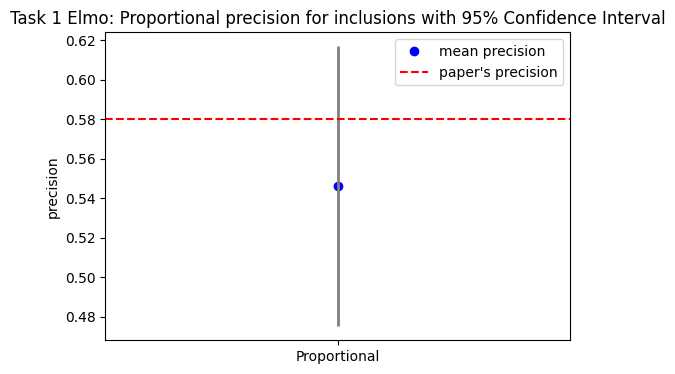

In [32]:
plot_metrics_elmo(proportional_precision_inc, "inclusions", "precision", 'Proportional', 0.58)

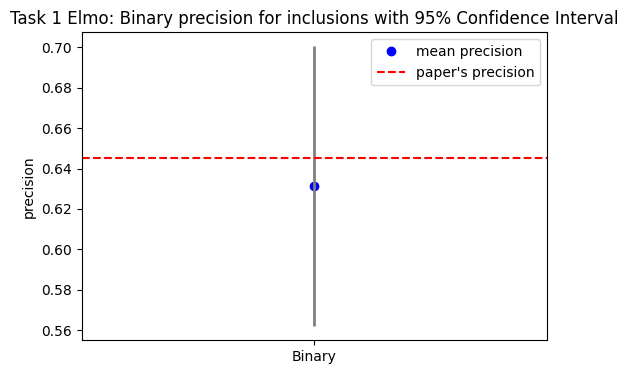

In [33]:
plot_metrics_elmo(binary_precision_inc, "inclusions", "precision", "Binary", 0.645)

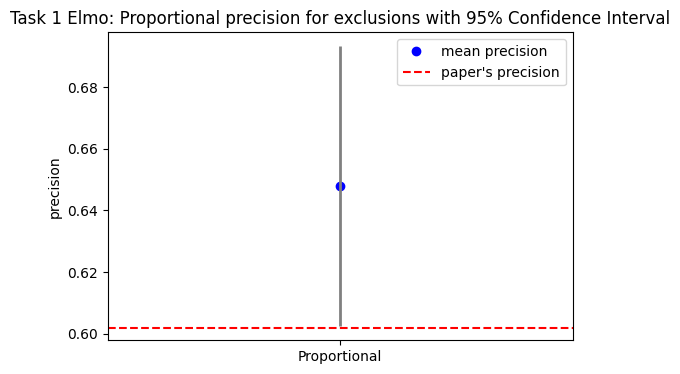

In [34]:
plot_metrics_elmo(proportional_precision_exc, "exclusions", "precision", "Proportional", 0.602)

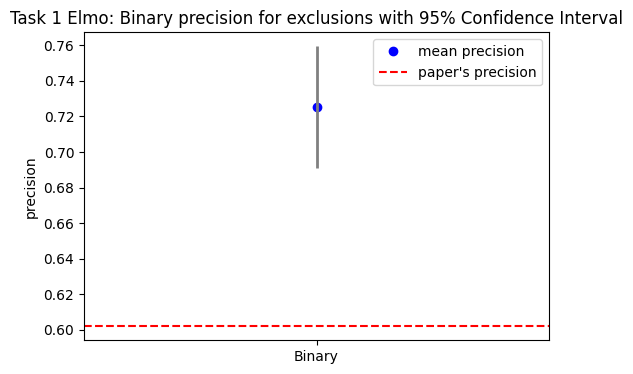

In [35]:
plot_metrics_elmo(binary_precision_exc, "exclusions", "precision", "Binary", 0.602)

### Results Bert Task 1

In [36]:
def load_results_bert_task1(dir_path, type):
  list_df_metrics = []
  for run in range(1, 6):
    file_name = f"{dir_path}/bert_metrics_{type}_run{run}.txt"
    df = pd.read_csv(file_name, sep = ";")
    list_df_metrics.append(df)
  return list_df_metrics


In [37]:
metrics_inc = load_results_bert_task1('drive/My Drive/Experiment Design/results_bert_task1', 'inclusions')
metrics_exc = load_results_bert_task1('drive/My Drive/Experiment Design/results_bert_task1', 'exclusions')

In [38]:
def plot_metrics_bert_task1(data, method, metric, type, score_paper):
  mean_data, lower_data, upper_data = calculate_confidence_interval(data)

  plt.figure(figsize = (6,4))
  plt.plot([type], [mean_data], 'o', color = 'blue', label = f'mean {metric}')
  plt.vlines(type, lower_data, upper_data, color = 'gray', linestyle = '-', lw = 2)
  plt.axhline(y = score_paper, color = 'r', linestyle ='--', label = f'paper\'s {metric}')

  plt.ylabel(metric)
  plt.title(f'Task 1 Bert: {type} {metric} for {method} with 95% Confidence Interval')
  plt.legend()
  plt.show()

In [39]:
# create list of metrics for inlcusions
proportional_precision_inc = [df.loc[0, "Proportional"] for df in metrics_inc]
binary_precision_inc = [df.loc[0, "Binary"] for df in metrics_inc]
proportional_recall_inc = [df.loc[1, "Proportional"] for df in metrics_inc]
binary_recall_inc = [df.loc[1, "Binary"] for df in metrics_inc]
proportional_f1_inc = [df.loc[2, "Proportional"] for df in metrics_inc]
binary_f1_inc = [df.loc[2, "Binary"] for df in metrics_inc]

# create list of metrics for exclusions
proportional_precision_exc = [df.loc[0, "Proportional"] for df in metrics_exc]
binary_precision_exc = [df.loc[0, "Binary"] for df in metrics_exc]
proportional_recall_exc = [df.loc[1, "Proportional"] for df in metrics_exc]
binary_recall_exc = [df.loc[1, "Binary"] for df in metrics_exc]
proportional_f1_exc = [df.loc[2, "Proportional"] for df in metrics_exc]
binary_f1_exc = [df.loc[2, "Binary"] for df in metrics_exc]

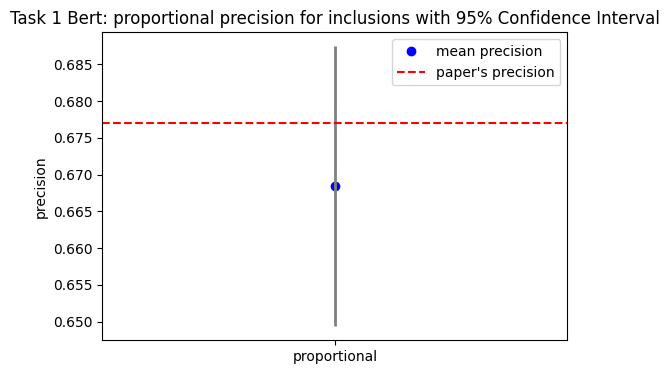

In [40]:
plot_metrics_bert_task1(proportional_precision_inc, 'inclusions', 'precision', 'proportional', 0.677)

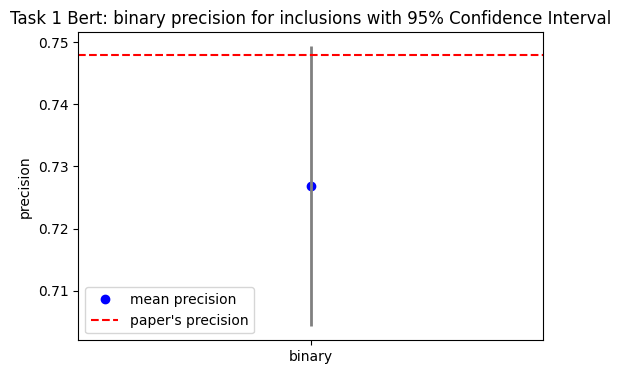

In [41]:
plot_metrics_bert_task1(binary_precision_inc, 'inclusions', 'precision', 'binary', 0.748)

### Results Bert Task 2

In [ ]:
def load_results_bert_task2(dir_path, type):
  accuracies = []
  for run in range(1, 6):
    file_name = f"{dir_path}/bert_metrics_{type}_run{run}.csv"
    df = pd.read_csv(file_name)
    df.rename(columns = {'Unnamed: 0':'class'}, inplace = True)
    accuracy = df.loc[11, 'precision']
    accuracies.append(accuracy)
  return accuracies

In [ ]:
# load the accuracies into list
accuracies_total = load_results_bert_task2('drive/My Drive/Experiment Design/results_bert_task2', 'total')
accuracies_inc = load_results_bert_task2('drive/My Drive/Experiment Design/results_bert_task2', 'inc')
accuracies_exc = load_results_bert_task2('drive/My Drive/Experiment Design/results_bert_task2', 'exc')

In [ ]:
paper_accuracy_total = 0.978
paper_accuracy_inc = 0.983
paper_accuracy_exc = 0.975

In [17]:
def calculate_confidence_interval(data):
  n = len(data)
  mean = np.mean(data)
  std_error = stats.sem(data)
  ci = std_error * stats.t.ppf((1 + 0.95) / 2, n - 1)
  return mean, mean - ci, mean + ci


In [ ]:
# calculate the confidence intervals
mean_total, lower_total, upper_total = calculate_confidence_interval(accuracies_total)
mean_inc, lower_inc, upper_inc = calculate_confidence_interval(accuracies_inc)
mean_exc, lower_exc, upper_exc = calculate_confidence_interval(accuracies_exc)


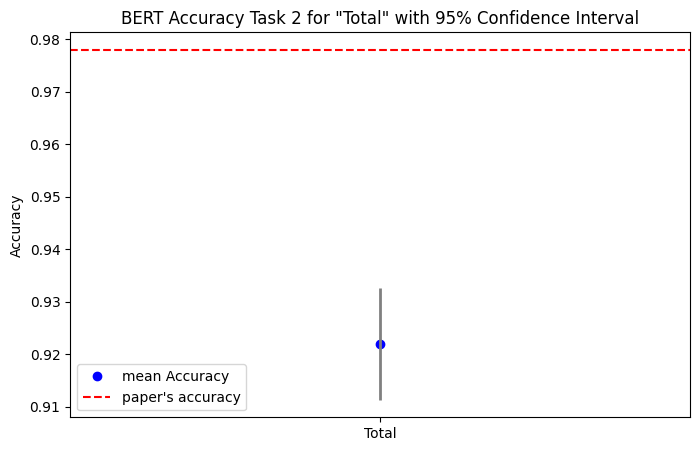

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(['Total'], [mean_total], 'o', color='blue', label='mean Accuracy')  # cean point
plt.vlines('Total', lower_total, upper_total, color='gray', linestyle='-', lw=2)  # confidence interval line
plt.axhline(y=paper_accuracy_total, color='r', linestyle='--', label='paper\'s accuracy')

plt.ylabel('Accuracy')
plt.title('BERT Accuracy Task 2 for "Total" with 95% Confidence Interval')
plt.legend()
plt.show()
